In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from s_dbw import S_Dbw
import math

In [9]:
# resets index after selections have been made
def resetindex(data):
    data=data.reset_index()
    data=data.drop('index', axis=1)
    return data

In [10]:
#reduces the data set to the first m iterations
def firstiterations(m,data):
    i=0
    j=0
    n=len(data.index)    
    while i<n:
        if  (data.iat[j,10]>m):
            data=data.drop(i, axis=0)
            i=i+1
        else:
            i=i+1
            j=j+1
    data=resetindex(data)
    return data

In [11]:
#reduces the data set to the last iteration of every combination
def lastiteration(data):
    i=0
    j=0
    n=len(data.index)    
    while i<n-1:
        if  (data.iat[j,4]==data.iat[j+1,4] and data.iat[j,5]==data.iat[j+1,5] and data.iat[j,10]<data.iat[j+1,10]):
            data=data.drop(i, axis=0)
            i=i+1
        else:
            i=i+1
            j=j+1
    data=resetindex(data)
    return data

In [12]:
# Generate a Series with a specific length, so that all residuals of one parameter combination are in one line
def GenerateSeries(source, Length):
    output=source.iloc[:,[4,5]]
    output=output.drop_duplicates()
    output=resetindex(output)
    for j in range(1, Length+1):
        output[f'ResidualNorm{j}']=0.0
        for i in range(len(output.index)):
            Abfrage=source.query( f"`Droptol`=={output.iat[i,0]} and `Fillfactor`=={output.iat[i,1]} and Iterations=={j}")
            if len(Abfrage.index)==1:
                output.iat[i,j+1]=Abfrage.iat[0,8]
            elif len(Abfrage.index)>1:
                raise Exception("Multiple instances with same Droptol, Fillfactor and Iteration within one Beta")
    return output

In [13]:
df=pd.read_csv('PCGDim16129.txt', sep='\t')
df=df.drop('Convergence Mode', axis=1)

beta=1e6
dfBeta=df.query(f"Beta=={beta}")
dfBeta=resetindex(dfBeta)

In [14]:
dfBeta

,ILUTNonzeros,Number of unknowns,Alpha,Beta,Droptol,Fillfactor,Tolerance,InitialResidualNorm,ResidualNorm,ResidualQuotient,Iterations,SolutionTime,ILUAssemblyTime,AbsoluteError,RelativeError
0,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,9.321650e+05,1.250810e+01,1,0.001520,0.011904,0.201276,0.990656
1,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,8.770640e+05,1.176880e+01,2,0.001559,0.011927,0.199391,0.981377
2,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,8.261410e+05,1.108550e+01,3,0.002426,0.012041,0.197517,0.972156
3,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,7.791050e+05,1.045430e+01,4,0.003080,0.011909,0.195653,0.962982
4,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,7.356910e+05,9.871760e+00,5,0.003344,0.011867,0.193797,0.953847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22961,16129,16129,1,1000000.0,1.000000e+04,9,1.000000e-14,74524.8,5.165350e-10,6.931050e-15,124,0.055134,0.010851,0.000057,0.000280
22962,16129,16129,1,1000000.0,1.000000e+04,9,1.000000e-14,74524.8,2.058180e-10,2.761740e-15,125,0.054617,0.010976,0.000057,0.000280
22963,16129,16129,1,1000000.0,1.000000e+04,9,1.000000e-14,74524.8,6.107510e-11,8.195270e-16,126,0.055019,0.010959,0.000057,0.000280
22964,16129,16129,1,1000000.0,1.000000e+04,9,1.000000e-14,74524.8,9.831910e-12,1.319280e-16,127,0.057092,0.010609,0.000057,0.000280


In [16]:
dfBetalast=lastiteration(dfBeta)
dfBetalast

,ILUTNonzeros,Number of unknowns,Alpha,Beta,Droptol,Fillfactor,Tolerance,InitialResidualNorm,ResidualNorm,ResidualQuotient,Iterations,SolutionTime,ILUAssemblyTime,AbsoluteError,RelativeError
0,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,5.711260e-15,7.663570e-20,128,0.062298,0.011982,0.000057,0.000280
1,53411,16129,1,1000000.0,1.000000e-12,1,1.000000e-14,74524.8,2.541820e+04,3.410700e-01,999,0.579575,0.013435,0.001839,0.009050
2,124096,16129,1,1000000.0,1.000000e-12,2,1.000000e-14,74524.8,2.049720e+02,2.750390e-03,999,0.700992,0.025400,0.002487,0.012239
3,156239,16129,1,1000000.0,1.000000e-12,3,1.000000e-14,74524.8,6.664450e-04,8.942590e-09,999,0.794260,0.029457,0.000056,0.000275
4,185356,16129,1,1000000.0,1.000000e-12,4,1.000000e-14,74524.8,7.413870e-16,9.948200e-21,11,0.009361,0.034378,0.000057,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,16129,16129,1,1000000.0,1.000000e+04,5,1.000000e-14,74524.8,5.711260e-15,7.663570e-20,128,0.042074,0.008043,0.000057,0.000280
86,16129,16129,1,1000000.0,1.000000e+04,6,1.000000e-14,74524.8,5.711260e-15,7.663570e-20,128,0.059401,0.009550,0.000057,0.000280
87,16129,16129,1,1000000.0,1.000000e+04,7,1.000000e-14,74524.8,5.711260e-15,7.663570e-20,128,0.068050,0.009325,0.000057,0.000280
88,16129,16129,1,1000000.0,1.000000e+04,8,1.000000e-14,74524.8,5.711260e-15,7.663570e-20,128,0.046346,0.009878,0.000057,0.000280


In [21]:
dfBetalast['SolutionTime'].sum()+dfBetalast['ILUAssemblyTime'].sum()

15.04624

In [28]:
dfBetafirst10=firstiterations(9,dfBeta)


In [29]:
dfBetafirst10=dfBetalast=lastiteration(dfBetafirst10)

In [30]:
dfBetafirst10

,ILUTNonzeros,Number of unknowns,Alpha,Beta,Droptol,Fillfactor,Tolerance,InitialResidualNorm,ResidualNorm,ResidualQuotient,Iterations,SolutionTime,ILUAssemblyTime,AbsoluteError,RelativeError
0,16129,16129,1,1000000.0,1.000000e-12,0,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.006076,0.011945,0.186410,0.917486
1,53411,16129,1,1000000.0,1.000000e-12,1,1.000000e-14,74524.8,1.079420e+06,1.448410e+01,9,0.008279,0.013482,0.172696,0.849989
2,124096,16129,1,1000000.0,1.000000e-12,2,1.000000e-14,74524.8,3.572920e+02,4.794270e-03,9,0.006603,0.025851,0.005566,0.027396
3,156239,16129,1,1000000.0,1.000000e-12,3,1.000000e-14,74524.8,3.024350e-01,4.058180e-06,9,0.007632,0.030556,0.000168,0.000827
4,185356,16129,1,1000000.0,1.000000e-12,4,1.000000e-14,74524.8,6.347120e-13,8.516800e-18,9,0.008596,0.034921,0.000057,0.000280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,16129,16129,1,1000000.0,1.000000e+04,5,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.003776,0.008665,0.186410,0.917486
86,16129,16129,1,1000000.0,1.000000e+04,6,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.004104,0.009266,0.186410,0.917486
87,16129,16129,1,1000000.0,1.000000e+04,7,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.003170,0.008010,0.186410,0.917486
88,16129,16129,1,1000000.0,1.000000e+04,8,1.000000e-14,74524.8,5.936700e+05,7.966080e+00,9,0.006422,0.012097,0.186410,0.917486


In [1]:
#This is the total time for all experiments:
dfBetafirst10['SolutionTime'].sum()+dfBetafirst10['ILUAssemblyTime'].sum()

In [15]:
#test different combinations and compute S_Dbw score
clustermax=12
optimizationgrid=np.zeros(clustermax-2)
SeriesLength=999
series=GenerateSeries(dfBeta,SeriesLength)
scaler = preprocessing.StandardScaler().fit(series.iloc[:,2:(2+SeriesLength)])
scaled_clusterdata=scaler.transform(series.iloc[:,2:(2+SeriesLength)])
for clustercount in range(2,clustermax):
    kmeans=KMeans(n_clusters=clustercount)
    y=kmeans.fit_predict(scaled_clusterdata)
    UnsortedClusters=y
    labels=kmeans.labels_
    score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')
    optimizationgrid[clustercount-2]=score

KeyboardInterrupt: 

In [8]:
       
# take best option based on the score      
minima=np.argwhere((optimizationgrid == np.min(optimizationgrid)))
minima=minima[0]
#clustercount=minima[0]+2
clustercount=11
series=GenerateSeries(dfBeta,SeriesLength)
scaler = preprocessing.StandardScaler().fit(series.iloc[:,2:(2+SeriesLength)])
scaled_clusterdata=scaler.transform(series.iloc[:,2:(2+SeriesLength)])
kmeans=KMeans(n_clusters=clustercount)
y=kmeans.fit_predict(scaled_clusterdata)
UnsortedClusters=y
labels=kmeans.labels_
score = S_Dbw(scaled_clusterdata, labels, centers_id=None, method='Halkidi', alg_noise='bind', centr='mean', nearest_centr=True, metric='euclidean')


#Sort clusters
SortingValues=np.zeros(clustercount)
SortData=pd.DataFrame(series[f'ResidualNorm{SeriesLength}'])
SortData['UnsortedClusters']=y
for i in range(0,clustercount):
    ResOfCluster=SortData.query(f'UnsortedClusters=={i}')
    sums=ResOfCluster[f"ResidualNorm{SeriesLength}"].sum()
    if sums==0:
        NonzerosInSeries=0
        for j in range(0,len(ResOfCluster.index)):
            ToBeCounted=series.loc[ResOfCluster.index[j],:]
            NonzerosInSeries= NonzerosInSeries+np.count_nonzero(ToBeCounted, axis=0)
        NonzerosInSeries=NonzerosInSeries/len(ResOfCluster.index)
        SortingValues[i]=-1000+NonzerosInSeries
    else:    
        SortingValues[i]=sums/len(ResOfCluster.index)

    
    
Sorting=np.argsort(np.argsort(SortingValues))
Clusters=np.zeros(shape=len(UnsortedClusters))
for i in range(0,len(Clusters)):
    Clusters[i]=Sorting[UnsortedClusters[i]]
Clusters=np.int_(Clusters)

series['Cluster']=Clusters


In [9]:
#Generate final provenance data, includig Droptol, Fillfactor, ILUTNonzeros, Time, and Cluster
series['ILUTNonzeros']=''
series['TimeAtSeriesLengthIteration']=''
lengthBasis=len(series.index)
for i in range(0,lengthBasis):
    series.iat[i,3+SeriesLength]=(dfBeta.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]}")).iat[0,0]
    series.iat[i,4+SeriesLength]=((dfBeta.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]} and Iterations<(1+{SeriesLength})")).sort_values(by=['Iterations'],ascending=False)).iat[0,11] + ((dfBeta.query(f"Droptol=={series.iat[i,0]} and Fillfactor=={series.iat[i,1]} and Iterations<(1+{SeriesLength})")).sort_values(by=['Iterations'],ascending=False)).iat[0,12]
    
ProvenanceData=series[['Droptol','Fillfactor','ILUTNonzeros','TimeAtSeriesLengthIteration','Cluster']]
ProvenanceData

,Droptol,Fillfactor,ILUTNonzeros,TimeAtSeriesLengthIteration,Cluster
0,1.000000e-12,0,16129,0.07428,2
1,1.000000e-12,1,53411,0.59301,8
2,1.000000e-12,2,124096,0.726392,7
3,1.000000e-12,3,156239,0.823717,4
4,1.000000e-12,4,185356,0.043739,0
...,...,...,...,...,...
85,1.000000e+04,5,16129,0.050117,2
86,1.000000e+04,6,16129,0.068951,2
87,1.000000e+04,7,16129,0.077375,2
88,1.000000e+04,8,16129,0.056224,2


In [10]:
#Filter and sort provenance data according to constraints and optimization goals
ILUTNonzerosLimit=76000
ProvenanceData
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(resetindex((ProvenanceData.query(f"ILUTNonzeros<{ILUTNonzerosLimit}")).sort_values(by=['Cluster','TimeAtSeriesLengthIteration'])))

         Droptol  Fillfactor ILUTNonzeros TimeAtSeriesLengthIteration  Cluster
0   1.000000e+02           5        16129                    0.046505        2
1   1.000000e+04           5        16129                    0.050117        2
2   1.000000e+04           8        16129                    0.056224        2
3   1.000000e-04           0        16129                    0.059535        2
4   1.000000e+00           5        16129                    0.060506        2
5   1.000000e+02           1        16129                    0.060518        2
6   1.000000e+02           6        16129                    0.060776        2
7   1.000000e+02           4        16129                     0.06141        2
8   1.000000e+00           1        16129                    0.062465        2
9   1.000000e+04           0        16129                    0.062507        2
10  1.000000e-06           0        16129                    0.062551        2
11  1.000000e+04           1        16129           

<br>
<br>
<br>
<strong> Visualizing parameter space

In [11]:
list=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
for cl in range(0,clustercount):
    vars()["PredictionGroup"+list[cl]]=series.query(f"`Cluster`=={cl} and ILUTNonzeros<{ILUTNonzerosLimit}")

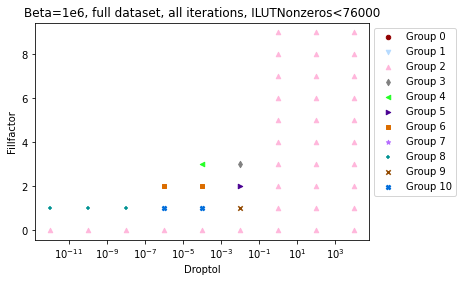

In [12]:
ax = PredictionGroup0.plot(kind='scatter', x='Droptol', y='Fillfactor',color='#920000', label='Group 0');
PredictionGroup1.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "v", color='#b6dbff', label='Group 1', ax=ax);
if clustercount>2:
    PredictionGroup2.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "^", color='#ffb6db', label='Group 2', ax=ax);
    if clustercount>3:
        PredictionGroup3.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "d",color='grey', label='Group 3', ax=ax);
        if clustercount>4:
            PredictionGroup4.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "<",color='#24ff24', label='Group 4', ax=ax);
            if clustercount>5:
                PredictionGroup5.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= ">",color='#490092', label='Group 5', ax=ax);
                if clustercount>6:
                    PredictionGroup6.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "s",color='#db6d00', label='Group 6', ax=ax);
                    if clustercount>7:
                        PredictionGroup7.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "*",color='#b66dff', label='Group 7', ax=ax);
                        if clustercount>8:
                            PredictionGroup8.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "+",color='#009292', label='Group 8', ax=ax);
                            if clustercount>9:
                                PredictionGroup9.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "x", color='#924900', label='Group 9', ax=ax);
                                if clustercount>10:
                                    PredictionGroup10.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "X",color='#006ddb', label='Group 10', ax=ax);
                                    if clustercount>11:
                                        PredictionGroup11.plot(kind='scatter', x='Droptol', y='Fillfactor',marker= "D",color='#004949', label='Group 11', ax=ax);
ax.set_xscale('log')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.title(f"Beta=1e{int(math.log10(beta))}, full dataset, all iterations, ILUTNonzeros<{ILUTNonzerosLimit}")
plt.show()

<br>
<br>
<br>
<strong> Visualizing trajectories

In [13]:
dfBeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22966 entries, 0 to 22965
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ILUTNonzeros         22966 non-null  int64  
 1   Number of unknowns   22966 non-null  int64  
 2   Alpha                22966 non-null  int64  
 3   Beta                 22966 non-null  float64
 4   Droptol              22966 non-null  float64
 5   Fillfactor           22966 non-null  int64  
 6   Tolerance            22966 non-null  float64
 7   InitialResidualNorm  22966 non-null  float64
 8   ResidualNorm         22966 non-null  float64
 9   ResidualQuotient     22966 non-null  float64
 10  Iterations           22966 non-null  int64  
 11  SolutionTime         22966 non-null  float64
 12  ILUAssemblyTime      22966 non-null  float64
 13  AbsoluteError        22966 non-null  float64
 14  RelativeError        22966 non-null  float64
dtypes: float64(10), int64(5)
memory usag

In [14]:
dfBeta['Cluster']=0

for i in range(len(dfBeta.index)):
    dfBeta.iat[i,15]=(series.query(f"`Droptol`=={dfBeta.iat[i,4]} and `Fillfactor`=={dfBeta.iat[i,5]}")).iat[0,SeriesLength+2]
    
    
list=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
for cl in range(0,clustercount):
    vars()["Group"+list[cl]]=dfBeta.query(f"`Cluster`=={cl} and ILUTNonzeros<{ILUTNonzerosLimit}")
    
    

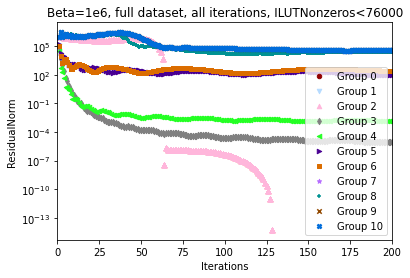

In [15]:
ax = Group0.plot(kind='scatter', x='Iterations', y='ResidualNorm',color='#920000', label='Group 0');
Group1.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "v",color='#b6dbff', label='Group 1',ax=ax);
if clustercount>2:
    Group2.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "^",color='#ffb6db', label='Group 2',ax=ax);
    if clustercount>3:
        Group3.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "d",color='grey', label='Group 3',ax=ax);
        if clustercount>4:
            Group4.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "<",color='#24ff24', label='Group 4',ax=ax);
            if clustercount>5:
                Group5.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= ">",color='#490092', label='Group 5', ax=ax);
                if clustercount>6:
                    Group6.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "s",color='#db6d00', label='Group 6', ax=ax);
                    if clustercount>7:
                        Group7.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "*",color='#b66dff', label='Group 7', ax=ax);
                        if clustercount>8:
                            Group8.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "+",color='#009292', label='Group 8', ax=ax);
                            if clustercount>9:
                                Group9.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "x",color='#924900', label='Group 9', ax=ax);
                                if clustercount>10:
                                    Group10.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "X",color='#006ddb', label='Group 10', ax=ax);
                                    if clustercount>11:
                                        Group11.plot(kind='scatter', x='Iterations', y='ResidualNorm',marker= "D",color='#004949', label='Group 11', ax=ax);
                                                                                
ax.set_yscale('log')
ax.set_xlim(0,200)
plt.legend(loc='lower right')
plt.title(f"Beta=1e{int(math.log10(beta))}, full dataset, all iterations, ILUTNonzeros<{ILUTNonzerosLimit}")
plt.show() 

No handles with labels found to put in legend.


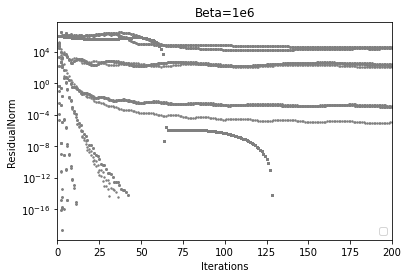

In [16]:
ax = dfBeta.plot(kind='scatter', x='Iterations', y='ResidualNorm',color='grey', s=2);
ax.set_yscale('log')
ax.set_xlim(0,200)
plt.legend(loc='lower right')
plt.title(f"Beta=1e{int(math.log10(beta))}")
plt.show()